In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam


train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
path = 'data'
train_generator = train_datagen.flow_from_directory(
        path+'/train',
        target_size=(28,28), 
        batch_size=1,
        class_mode='sparse')

validation_generator = train_datagen.flow_from_directory(
        path+'/val',
        batch_size=1,
        target_size=(28,28),
        class_mode='sparse')

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [3]:
model = Sequential()
model.add(Conv2D(16, (22,22), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (16,16), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (8,8), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (4,4), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer=Adam(learning_rate=0.0001),   
    metrics=['accuracy']               
)


C:\Users\MRITH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │          23,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,224,276 (4.67 MB)

 Trainable params: 1,224,276 (4.67 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
result = model.fit(
      train_generator,
      validation_data = validation_generator,epochs=30,verbose=1)

Epoch 1/30
  1/864 ━━━━━━━━━━━━━━━━━━━━ 46:54 3s/step - accuracy: 0.0000e+00 - loss: 3.5220

C:\Users\MRITH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


864/864 ━━━━━━━━━━━━━━━━━━━━ 94s 105ms/step - accuracy: 0.0655 - loss: 3.3876 - val_accuracy: 0.5787 - val_loss: 1.6162
Epoch 2/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 94s 108ms/step - accuracy: 0.5916 - loss: 1.3570 - val_accuracy: 0.7454 - val_loss: 0.7512
Epoch 3/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 93s 108ms/step - accuracy: 0.8211 - loss: 0.5957 - val_accuracy: 0.8704 - val_loss: 0.3387
Epoch 4/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 89s 103ms/step - accuracy: 0.8682 - loss: 0.4248 - val_accuracy: 0.9167 - val_loss: 0.2703
Epoch 5/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 113s 69ms/step - accuracy: 0.9121 - loss: 0.3116 - val_accuracy: 0.9630 - val_loss: 0.1796
Epoch 6/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.9252 - loss: 0.2798 - val_accuracy: 0.9722 - val_loss: 0.0963
Epoch 7/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9307 - loss: 0.2091 - val_accuracy: 0.9537 - val_loss: 0.1821
Epoch 8/30
864/864 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9345 - loss: 0.2052 - val_ac

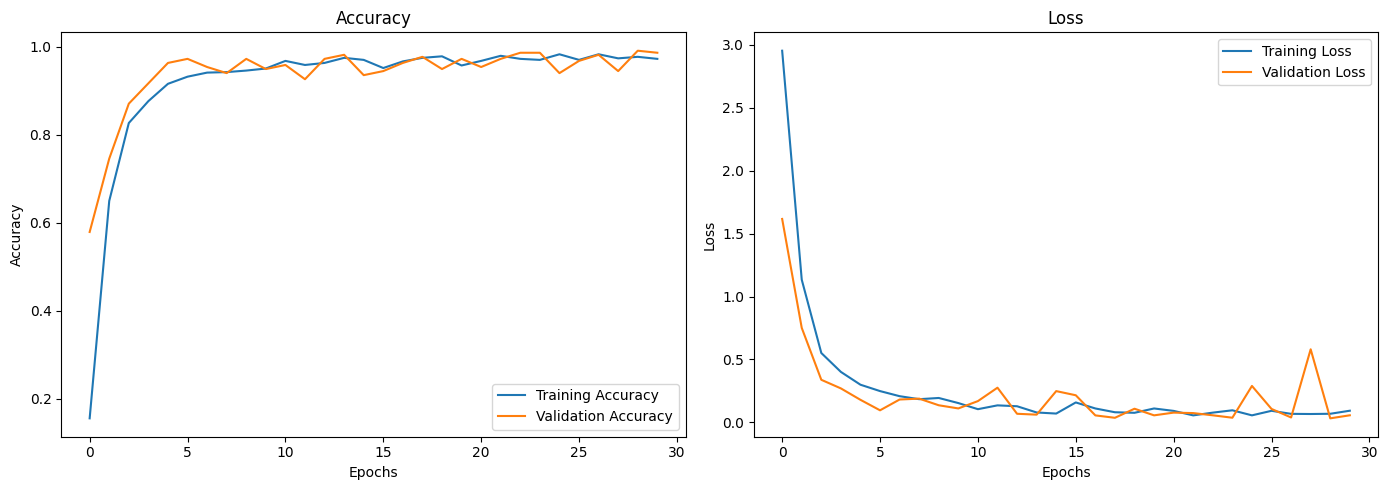

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(14, 5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0])
ax1.plot(result.history['accuracy'], label='Training Accuracy')
ax1.plot(result.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2 = fig.add_subplot(grid[1])
ax2.plot(result.history['loss'], label='Training Loss')
ax2.plot(result.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()


In [7]:
model.save_weights('chars.weights.h5')